# Assignment

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1. Count of one categorical feature

In [ ]:
df['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

Keterangan jenis fondasi rumah:
- BrkTil = Brick & Tile (bata dan ubin)
- CBlock = Cinder Block
- PConc = Poured Concrete (beton)
- Slab = Slab
- Stone = Stone
- Wood = Wood

In [ ]:
df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

Berdasarkan hasil penghitungan di atas:
- Sebagian besar rumah yang dijual  menggunakan fondasi beton (647 rumah) dan fondasi cinder block (643 rumah)
- Sebagian kecil rumah lainnya menggunakan fondasi bata dan ubin (146 rumah)
- Rumah lainnya: menggunakan fondasi slab/lempeng (24 rumah), fondasi batu (6 rumah), fondasi kayu (3 rumah)

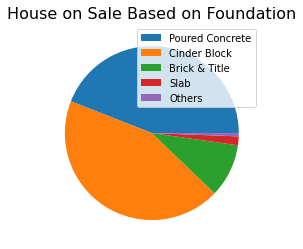

In [ ]:
#Proporsi jenis fondasi rumah dari data perumahan
import matplotlib.pyplot as plt
import numpy as np

x = np.array([647, 643, 146, 24, 9])
mylabels = ["Poured Concrete", "Cinder Block", "Brick & Title", "Slab", "Others"]

plt.pie(x)
plt.legend(mylabels)
plt.title('House on Sale Based on Foundation', fontsize=16)
plt.show() 

# 2. Distribution of one continuous feature

In [ ]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

data tidak memiliki nilai minus, namun mean lebih besar dari median, menandakan data memiliki distribusi menceng kanan atau positive skewnes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


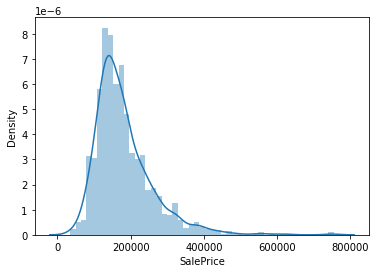

In [ ]:
sns.distplot(df.SalePrice)

- Grafik menunjukkan bahwa  rata - rata harga rumah yang dijual memiliki nilai lebih tinggi dari pada nilai tengah sebarannya. 

- Sebagian besar rumah yang dijual dengan sale price pada kisaran harga 100000 - 400000
- Sebagian kecil rumah lainnya dijual dengan harga >400000 hingga 800000

# 3. Categorical-continuous

kolom data yang digunakan:
- **data kategorikal 'OverallCond'** = Rating of the overall condition of the house: 10 = Very Excellent, 9 = Excellent, 8 = Very Good, 7 = Good, 6 = Above Average, 5 = Average, 4 = Below Average, 3 = Fair, 2 = Poor, 1 = Very Poor
- **Data continuous 'SalesPrice'**

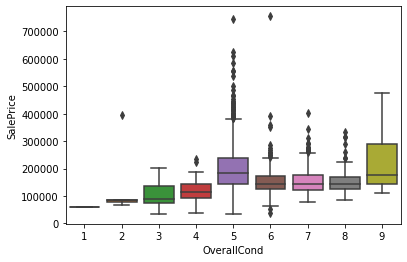

In [ ]:
sns.boxplot(y=df['SalePrice'],x=df['OverallCond'])

**insight:**
 - Terdapat korelasi antara harga jual rumah dengan overall condition dari rumah tersebut: Rumah yang memiliki rating tinggi (excellent = 9) umumnya memiliki sale price lebih tinggi dan begitu juga sebaliknya, semakin rendah rating rumah, maka semakin murah harganya.
 - Sebagian besar rumah yang dijual memiliki rating 5 (average) atau memiliki kondisi bangunan rumah rata-rata.
 - Rumah dengan rating 6 (above average) atau kondisi rumah di atas rata-rata,  memiliki rentang sale price yang paling luas yaitu antara 100000 - 700000



# 4. Continuous-continuous

Kolom data yang digunakan:
- GarageArea : Luas garasi dalam square feet
- SalePrice : Harga Sale

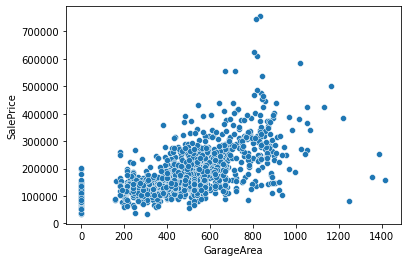

In [ ]:
sns.scatterplot(y=df['SalePrice'],x=df['GarageArea'])

**Insight:**
- Kebanyakan rumah yang dijual memiliki luas area garasi antara 200 - 1000 feet square
- Harga jual rumah memiliki korelasi dengan luas garasi : rumah yang dijual dengan garasi lebih luas cenderung memiliki harga lebih mahal, begitu juga sebaliknya, rumah dengan luas garasi yang kecil cenderung lebih murah
- Meski demikian rumah dengan garasi paling luas tidak menjadi rumah yang paling mahal (dimungkinkan ada faktor variabel lain semisal kualitas rumah, luas bangunan rumah, dll)

